In [1]:
import os, yaml, sys
import numpy as np
import joblib
import pandas as pd
from scipy.io import loadmat
import xarray as xr
import matplotlib.pyplot as plt
ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from experiments.utils import map_on_savenames

[Tiziano-Causin.local:26317] shmem: mmap: an error occurred while determining whether or not /var/folders/nw/yf48zdjj1m5012281wx_pzhc0000gn/T//ompi.Tiziano-Causin.501/jf.0/774504448/sm_segment.Tiziano-Causin.501.2e2a0000.0 could be created.


In [2]:
model_name1, model_name2 = "resnet50", "vit_b_16"
layer_name1, layer_name2 = "layer3.1.relu_2", "encoder.layers.encoder_layer_4.add_1"

model_save_name1, layer_save_name1 = map_on_savenames(model_name1, layer_name1)
model_save_name2, layer_save_name2 = map_on_savenames(model_name2, layer_name2)

10:02:21 - falling back to the same name


In [3]:
image_names_path = f"{paths['neural_data_path']}/Caos-08262025-002_ImageNames_1.xls"
image_names = pd.read_excel(image_names_path) 


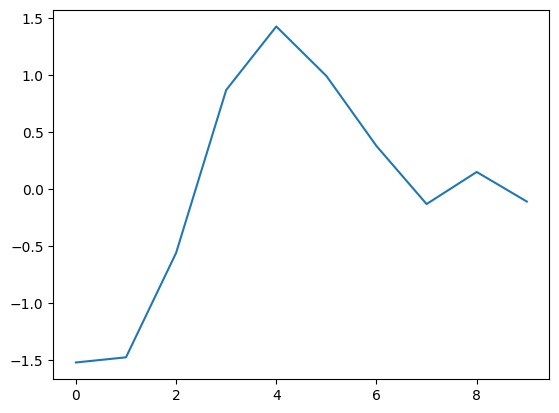

In [47]:
plt.plot(firing_rate)

In [4]:
spike_meta_path = f"{paths['neural_data_path']}/Caos-08262025-002_spikeMeta_1.csv"
spike_meta = pd.read_csv(spike_meta_path)

In [ ]:
# spikeID is the electrode where the sorted spike has come from, 
#unitID is the rank of (usually) the multiunits we are recording from that channel (like 1, 2, 3 - 0 means throw away)

# 1) take away the zeros
nan_mask = np.where(spike_meta["unitID"].values==0)[0] 
cleaned_spikeID = np.delete(spike_meta["spikeID"].values, nan_mask)
cleaned_unitID = np.delete(spike_meta["unitID"].values, nan_mask)
# 2) write down where the first multiunit for each channel
initial_unit = np.where(cleaned_unitID ==1)[0]

# 3) index the beginning and end of each brain area for Caos
V1 = initial_unit[[0,31]] 
V4 = initial_unit[[32,63]]
IT = initial_unit[[64, 95]]
print(V1, V4, IT)

In [5]:
time_series_path = f"{paths['neural_data_path']}/Caos-08262025-002_responseTimeSeriesPerTrial_1.mat"
time_series = loadmat(time_series_path)['responseTimeSeriesPerTrial'] # this shape : (129, 200, 7229)

In [36]:
time_series_clean = np.delete(time_series, nan_mask, axis=0)
avg_across_imgs = np.mean(time_series_clean, axis=2)

In [39]:

def normalize_neural_activity(neural_response): 
    """
    INPUT : 
    neural response np.array (units x time (ms)) already averaged across the third dimension (images)
    """
    avg_neural_resp = neural_response.mean(axis=1, keepdims=True) # average across time points
    std_neural_resp = neural_response.std(axis=1, keepdims=True)
    normalized_avg_resp = (neural_response - avg_neural_resp) / std_neural_resp
    return normalized_avg_resp

In [40]:
normalized_resp = normalize_neural_activity(avg_across_imgs)

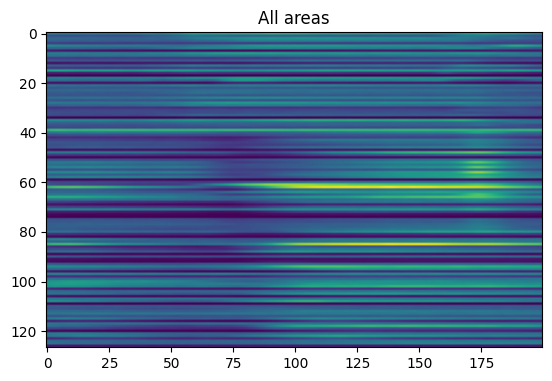

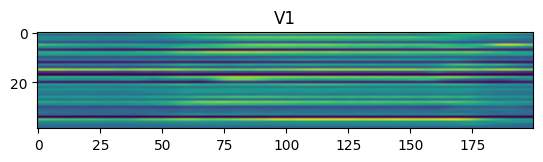

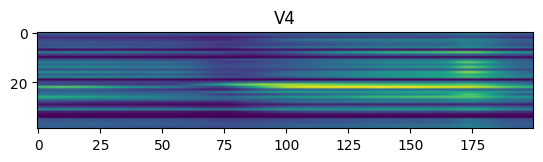

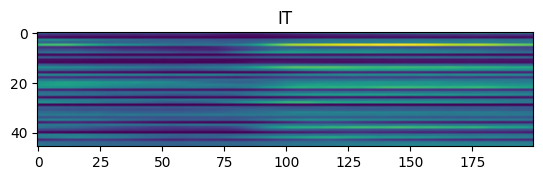

In [50]:
plt.figure()
plt.imshow(avg_across_imgs, cmap='viridis')
plt.title("All areas")
plt.show()

plt.figure()
plt.imshow(avg_across_imgs[V1[0]:V1[1], :], cmap='viridis')
plt.title("V1")
plt.show()

plt.figure()
plt.imshow(avg_across_imgs[V4[0]:V4[1], :], cmap='viridis')
plt.title("V4")
plt.show()

plt.figure()
plt.imshow(avg_across_imgs[IT[0]:IT[1], :], cmap='viridis')
plt.title("IT")
plt.show()

#plt.plot(normalized_avg_resp)

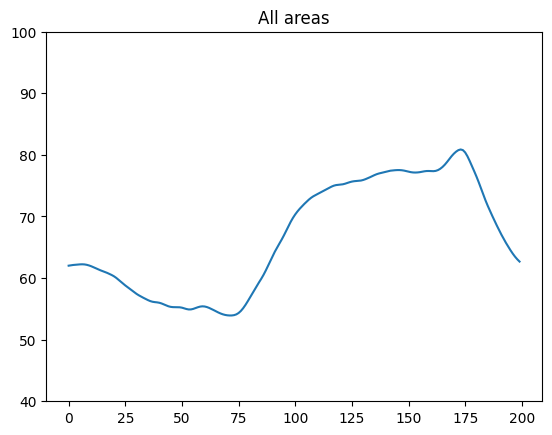

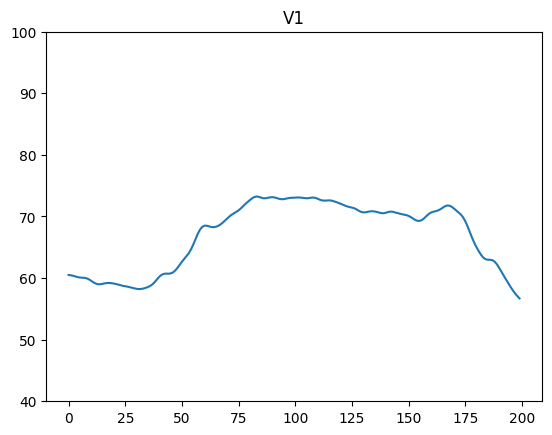

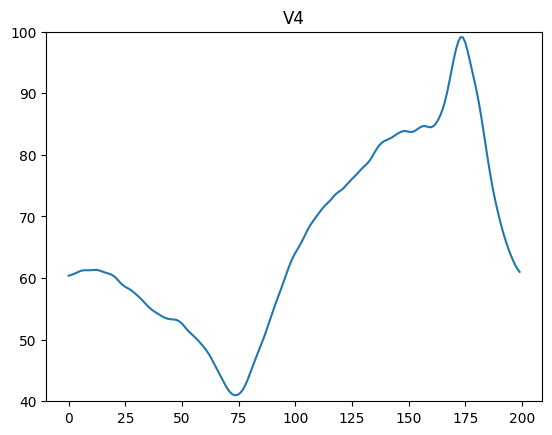

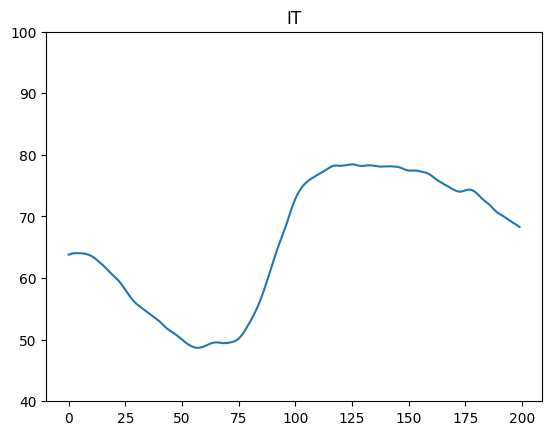

'\nplt.figure()\nplt.imshow(avg_across_imgs[V1[0]:V1[1], :], cmap=\'viridis\')\nplt.title("V1")\nplt.show()\n\nplt.figure()\nplt.imshow(avg_across_imgs[V4[0]:V4[1], :], cmap=\'viridis\')\nplt.title("V4")\nplt.show()\n\nplt.figure()\nplt.imshow(avg_across_imgs[IT[0]:IT[1], :], cmap=\'viridis\')\nplt.title("IT")\nplt.show()\n\n#plt.plot(normalized_avg_resp)\n'

In [64]:
plt.figure()
plt.plot(avg_across_imgs.mean(axis=0))
plt.title("All areas")
plt.ylim(40, 100)
plt.errorbar(range(200), np.ones(200))
plt.show()

plt.figure()
plt.plot(avg_across_imgs[V1[0]:V1[1], :].mean(axis=0))
plt.title("V1")
plt.ylim(40, 100)
plt.show()

plt.figure()
plt.plot(avg_across_imgs[V4[0]:V4[1], :].mean(axis=0))
plt.title("V4")
plt.ylim(40, 100)
plt.show()

plt.figure()
plt.plot(avg_across_imgs[IT[0]:IT[1], :].mean(axis=0))
plt.title("IT")

plt.ylim(40, 100)

plt.show()
"""
plt.figure()
plt.imshow(avg_across_imgs[V1[0]:V1[1], :], cmap='viridis')
plt.title("V1")
plt.show()

plt.figure()
plt.imshow(avg_across_imgs[V4[0]:V4[1], :], cmap='viridis')
plt.title("V4")
plt.show()

plt.figure()
plt.imshow(avg_across_imgs[IT[0]:IT[1], :], cmap='viridis')
plt.title("IT")
plt.show()

#plt.plot(normalized_avg_resp)
"""

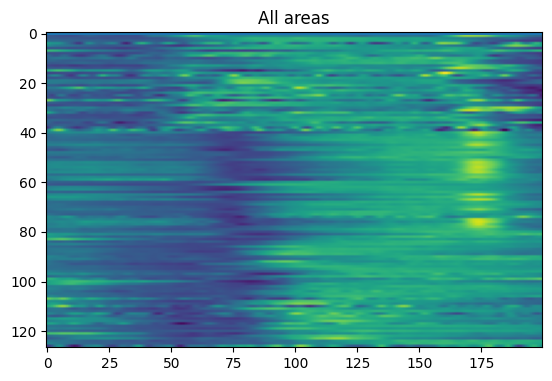

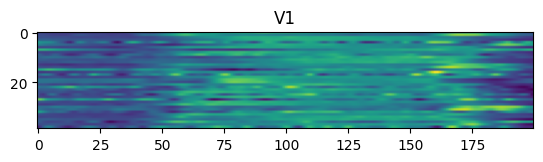

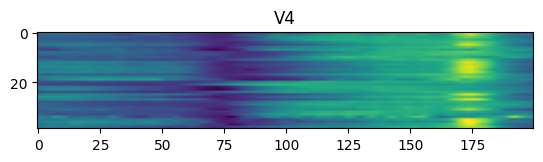

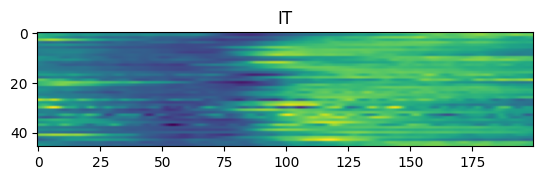

In [61]:
plt.figure()
plt.imshow(normalized_resp, cmap='viridis', vmin=np.min(normalized_avg_resp), vmax=np.max(normalized_avg_resp))
plt.title("All areas")
plt.show()

plt.figure()
plt.imshow(normalized_resp[V1[0]:V1[1], :], cmap='viridis')
plt.title("V1")
plt.show()

plt.figure()
plt.imshow(normalized_resp[V4[0]:V4[1], :], cmap='viridis')
plt.title("V4")
plt.show()

plt.figure()
plt.imshow(normalized_resp[IT[0]:IT[1], :], cmap='viridis')
plt.title("IT")
plt.show()

#plt.plot(normalized_avg_resp)

In [53]:
#avg_resp_per_pic = np.mean(time_series, axis=1)
#normalized_avg_resp_per_pic = (avg_resp_per_pic - avg_resp_per_pic.mean(axis=1, keepdims=True)) / avg_resp_per_pic.std(axis=1, keepdims=True)

In [43]:
model1_idx = np.where([model_save_name1 in name for name in image_names.imageNames])[0]
model2_idx = np.where([model_save_name2 in name for name in image_names.imageNames])[0]
model1_2_idx = np.where(set(model1_idx) & set(model2_idx))[0]
only_mod1_idx = np.where(set(model1_idx) - set(model2_idx))[0]
only_mod2_idx = np.where(set(model2_idx) - set(model1_idx))[0]
model1_responses = time_series[:, :, only_mod1_idx]

[ 0 39] [40 79] [ 80 126]


In [44]:
print(normalized_resp[0,:])

[-1.38271271 -1.38900104 -1.40996165 -1.44601115 -1.4885343  -1.51913282
 -1.52372303 -1.50498637 -1.4806304  -1.46624427 -1.46753442 -1.48560978
 -1.5226363  -1.57425148 -1.62525518 -1.6588371  -1.66592685 -1.64818762
 -1.61631783 -1.58813968 -1.57951258 -1.58905727 -1.59709635 -1.58192241
 -1.54418047 -1.50651013 -1.49469552 -1.51458797 -1.55136926 -1.58637193
 -1.61133161 -1.62706633 -1.62726011 -1.5962768  -1.52502361 -1.42188461
 -1.30571882 -1.19233255 -1.09129228 -1.01400794 -0.97768319 -0.99436717
 -1.06039522 -1.156893   -1.25286302 -1.31008578 -1.29463023 -1.19479069
 -1.03228108 -0.85410946 -0.70254333 -0.58614821 -0.47824061 -0.34167788
 -0.1575371   0.06300048  0.29025184  0.48851325  0.62569055  0.68576507
  0.67922851  0.63941051  0.60323282  0.59320259  0.6116223   0.65058878
  0.69979368  0.75669037  0.82410843  0.89974826  0.96938018  1.01188797
  1.0189939   1.00327897  0.98809845  0.99285247  1.02407314  1.07558868
  1.13280806  1.17938227  1.20576992  1.21645166  1

In [46]:
# Example parameters
resp = normalized_resp[0, :]   # take one trial
fs = 1000   # sampling rate in Hz (samples per second), adjust to your case
bin_size_ms = 20
bin_size = int(fs * bin_size_ms / 1000)  # samples per bin

# Reshape into bins (truncate the last incomplete bin)
n_bins = len(resp) // bin_size
resp_binned = resp[:n_bins * bin_size].reshape(n_bins, bin_size)

# Compute average firing rate per bin
firing_rate = resp_binned.mean(axis=1)

print(firing_rate.shape)  # (n_bins,)
print(firing_rate)

(10,)
[-1.5231817  -1.47787493 -0.56205124  0.86769852  1.42488201  0.99055149
  0.3759744  -0.13328795  0.14837161 -0.1110822 ]
